# Projet 3 - Discrimination de tumeurs bénignes et malignes

<h2> <b>1) Analyse exploratoire</b> </h2>

<h3 style="color:blue"><b> 1.1) Import des librairies </b></h3>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual, Dropdown, IntSlider # création de visualisations interactive

<h3 style="color:blue"><b> 1.2) Chargement du Dataset</b></h3>

In [2]:
df = pd.read_csv("Dataset/tumor.csv", sep=";")

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<h3 style="color:blue"><b> 1.3) Dimensions du Dataset</b></h3>

In [3]:
df.shape

(569, 32)

<h3 style="color:blue"><b> 1.4) Infos du Dataset</b></h3>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<h3 style="color:blue"><b> 1.5) Supression des colonnes inutiles</b></h3>

In [5]:
df = df.drop(columns="id", axis=1)

In [6]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<h3 style="color:blue"><b> 1.6) Extraction des colonnes pour l'analyse</b></h3>

In [7]:
df = df.iloc[:, 0:10]

In [8]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean'],
      dtype='object')

<h3 style="color:blue"><b> 1.7) Répartition des diagnostics</b></h3>

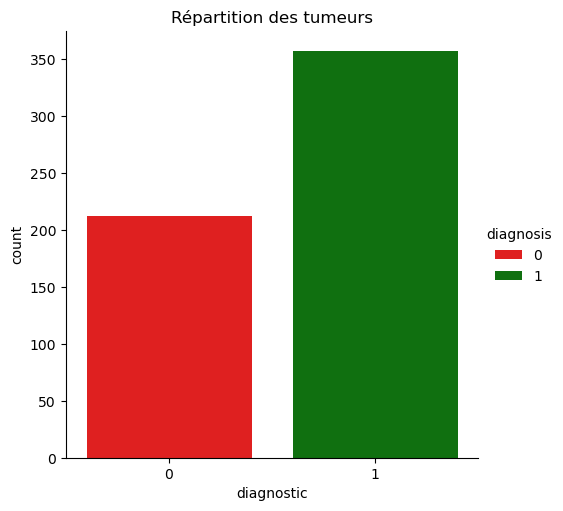

In [174]:
import seaborn as sns

sns.catplot(
    data=df,
    x="diagnosis",
    kind="count",
    hue="diagnosis",
    palette={0 : "red", 1 : "green"}
)

plt.xlabel("diagnostic")
plt.title("Répartition des tumeurs")
plt.show()

In [165]:
def hist_plot(var, bins):

    plt.figure(figsize=(12,6))
    
    sns.histplot(
        data=df,
        x=var,
        bins= bins,
        hue="diagnosis",
        kde=True,
        palette={0: "red", 1: "green"}
    )

    plt.xlabel(var)
    plt.ylabel("Count")
    plt.title(f"Histogramme of {var}")

    return plt.show()

In [166]:
# Création du widget interactif
var_list = list(df.columns[1:])  # Exclut "diagnosis"
col_selector = Dropdown(options=var_list, description="X")
bins_slider = IntSlider(min=5, max=100, step=5, value=20, description="Bins")

interact(hist_plot, var=col_selector,  bins=bins_slider)

interactive(children=(Dropdown(description='X', options=('radius_mean', 'texture_mean', 'perimeter_mean', 'are…

<function __main__.hist_plot(var, bins)>

In [114]:
from sklearn.linear_model import LinearRegression

In [150]:
def linear_regression(var_x, var_y):
    X = df[[var_x]]  # Scikit-Learn attend X sous forme de tableau 2D
    y = df[var_y]

    plt.figure(figsize=(12,6))
    
    model = LinearRegression()  # Instanciation du modèle
    model.fit(X, y)  # Entraînement du modèle

    a = model.coef_[0]  # Pente (a)
    b = model.intercept_  # Ordonnée à l'origine (b)
    reg = model.predict(X)  # Prédictions

    correlation = df[var_x].corr(df[var_y])
    
    # Affichage
    sns.scatterplot(data=df, x=var_x, y=var_y, hue="diagnosis", palette={0: "red", 1: "green"}, alpha = 0.6)
    plt.plot(df[var_x], reg, color="blue", linestyle="-", label=f"Régression Linéaire - R2 : {round(correlation,2)}")
    plt.xlabel(var_x)
    plt.ylabel(var_y)
    plt.title(f"Régression Linéaire : {var_x} VS {var_y}")
    plt.legend()
    return plt.show()

In [151]:
# Widget pour interagir avec scatter_plot
var_list = list(df.columns[1:])  # Exclut "diagnosis"
col_selector_x = Dropdown(options=var_list, description="X")
col_selector_y = Dropdown(options=var_list, description="Y")

interact(linear_regression, var_x=col_selector_x, var_y=col_selector_y)


interactive(children=(Dropdown(description='X', options=('radius_mean', 'texture_mean', 'perimeter_mean', 'are…

<function __main__.linear_regression(var_x, var_y)>

<Axes: >

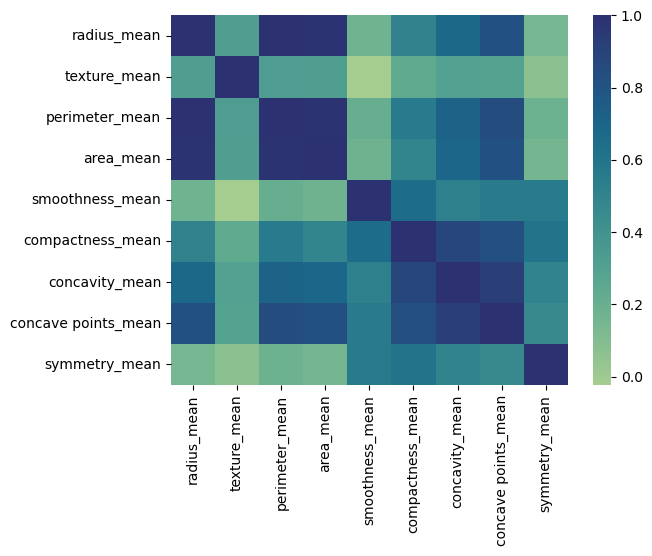

In [130]:
sns.heatmap(df.iloc[:, 1:].corr(), cmap="crest")

## 2) Classification des tumeurs bégines et malignes

In [9]:
df["diagnosis"] = df["diagnosis"].replace(["M","B"], [0,1])

C:\Users\rabah\AppData\Local\Temp\ipykernel_3804\3969740610.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["diagnosis"] = df["diagnosis"].replace(["M","B"], [0,1])


In [10]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809


In [11]:
X = df.drop("diagnosis", axis=1).values
y = df["diagnosis"].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_test.shape)

(455, 9)
(114,)


In [15]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

print(f"Train set : {model.score(X_train, y_train)}")
print(f"Test set : {model.score(X_test, y_test)}")

Train set : 1.0
Test set : 0.9473684210526315


In [167]:
from sklearn.model_selection import cross_val_score, validation_curve, GridSearchCV, learning_curve

In [17]:
print(model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [18]:
cross_val_score(RandomForestClassifier(n_estimators=4), X_train, y_train, cv=5, scoring="accuracy").mean()

np.float64(0.9252747252747252)

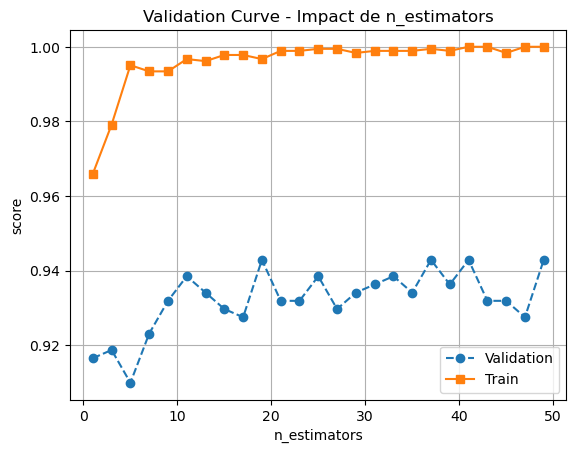

In [19]:
model = RandomForestClassifier(max_depth=None, n_jobs=-1)
k = np.arange(1, 50, 2) 

train_score, val_score = validation_curve(model, X_train, y_train, param_name="n_estimators", param_range=k, cv=5)

plt.plot(k, val_score.mean(axis=1), label="Validation", linestyle="--", marker="o")
plt.plot(k, train_score.mean(axis=1), label="Train", linestyle="-", marker="s")

plt.xlabel("n_estimators")
plt.ylabel("score")
plt.title("Validation Curve - Impact de n_estimators")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
params_grid = {
    "n_estimators": np.arange(1, 50, 2) ,  # Nombre d'arbres dans la forêt
    "max_depth": np.arange(5, 20, 5),  # Profondeur maximale des arbres
}

grid = GridSearchCV(RandomForestClassifier(), param_grid=params_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 5, 10, 15]),
                         'n_estimators': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])})

In [21]:
grid.best_score_

np.float64(0.945054945054945)

In [22]:
grid.best_params_

{'max_depth': np.int64(10), 'n_estimators': np.int64(25)}

In [23]:
model = grid.best_estimator_

model.score(X_test, y_test)

0.9473684210526315

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix(y_test, model.predict(X_test))

array([[40,  3],
       [ 3, 68]])

[ 36  72 109 145 182 218 254 291 327 364]


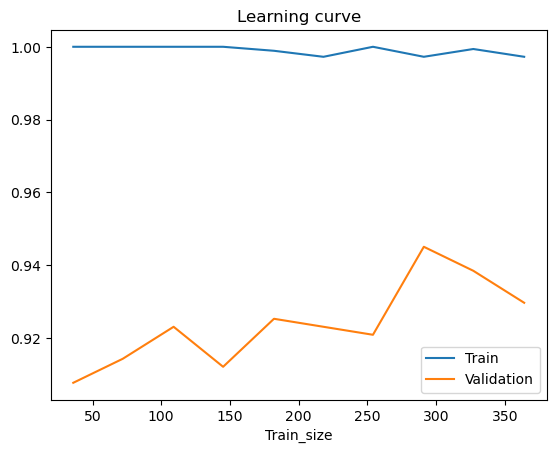

In [170]:
N, train_score, val_score = learning_curve(model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1, 10))

print(N)
plt.plot(N, train_score.mean(axis=1), label = "Train")
plt.plot(N, val_score.mean(axis=1), label = "Validation")
plt.xlabel("Train_size")
plt.title("Learning curve")
plt.legend()